### The following are useful functions for measuring serial dependence applied to the measurement of the response bias induced by the oriented distractor for WM_DistractV11

- DoG_fit: fits real data input with a the curve of the first derivative of a gaussian
- puredog: generates a first derivative of a gaussian you can use to test various parameter values

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

def DoG_fit(x, y, plots=False):
    # Define the first derivative of a Gaussian model
    def gaussian_derivative(p, x):
        w, amp = p
        k = np.sqrt(2) / np.exp(-0.5)
        y_model = x * amp * w * k * np.exp(-w * x**2)
        return y_model

    def objective_function(p, x, y):
        y_model = gaussian_derivative(p, x)
        return np.sum((y - y_model)**2)

    # Initial parameter values
    initial_params = np.array([0.01, 30])

    # Use minimize to fit the model to the data
    fit_result = minimize(objective_function, initial_params, args=(x, y), method="Nelder-Mead")

    # Extract the fitted parameters
    fitted_params = fit_result.x

    # Generate the fitted curve
    y_fit = gaussian_derivative(fitted_params, x)

    # Calculate R-squared
    ss_total = np.sum((y - np.mean(y))**2)
    ss_residual = np.sum((y - y_fit)**2)
    r_squared = 1 - ss_residual / ss_total

    # Plot the original data and the fitted curve
    if plots:
        plt.plot(x, y, color="blue", linewidth=2, label="Data")
        plt.plot(x, y_fit, color="red", linewidth=2, linestyle="--", label="Fitted Curve")
        plt.xlabel("x")
        plt.ylabel("y")
        plt.title("Fitted Gaussian Derivative")
        plt.legend()
        plt.show()

    return np.concatenate((fitted_params, np.array([r_squared]), y_fit))

# Example usage:
# x: range of possible values over which serial dependence measure influences your data, -89:90 deg
# y: behavioral error measurement, deg (from circular standard deviation)
# DoG_fit_result = DoG_fit(x_data, y_data, plots=True)


In [3]:
def puredog(w, a, x, noise):
    k = np.sqrt(2) / np.exp(-0.5)
    y = x * a * w * k * np.exp(-w * x**2) + np.random.normal(0, noise, len(x))
    
    plt.plot(x, y, color="blue", linewidth=2)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("DoG Function")
    plt.show()
    
    return np.column_stack((x, y))


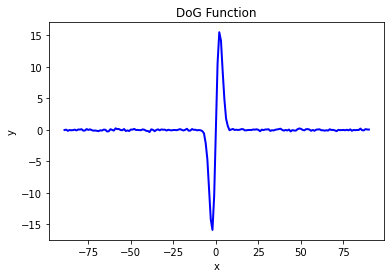

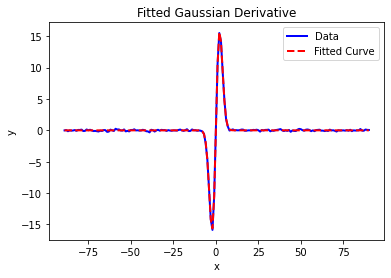

In [4]:
# Example usage:
# Replace the values with your desired parameters
# w is curve width scaling parameter
# a is amplitude of curve peaks, interpret as the amount of serial dependence bias
df = puredog(0.1, 50, np.arange(-89, 91), 0.1)
DoG_fit_result = DoG_fit(df[:, 0], df[:, 1], plots=True)